In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
sales = pd.read_excel("stockx_scraper-master/sales.xlsx")

In [15]:
sales

,Unnamed: 0,url,Size,Sale Price,Date,Time
0,0,https://stockx.com//adidas-yeezy-boost-350-v2-...,10.0,$243,"Monday, October 26, 2020",5:08 PM EST
1,1,https://stockx.com//adidas-yeezy-boost-350-v2-...,12.0,$263,"Monday, October 26, 2020",5:06 PM EST
2,2,https://stockx.com//adidas-yeezy-boost-350-v2-...,12.5,$273,"Monday, October 26, 2020",5:04 PM EST
3,3,https://stockx.com//adidas-yeezy-boost-350-v2-...,10.0,$252,"Monday, October 26, 2020",5:01 PM EST
4,4,https://stockx.com//adidas-yeezy-boost-350-v2-...,10.5,$253,"Monday, October 26, 2020",4:56 PM EST
5,5,https://stockx.com//adidas-yeezy-boost-350-v2-...,10.0,$240,"Monday, October 26, 2020",4:54 PM EST
6,6,https://stockx.com//adidas-yeezy-boost-350-v2-...,10.0,$250,"Monday, October 26, 2020",4:49 PM EST
7,7,https://stockx.com//adidas-yeezy-boost-350-v2-...,10.0,$250,"Monday, October 26, 2020",4:46 PM EST
8,8,https://stockx.com//adidas-yeezy-boost-350-v2-...,7.0,$280,"Monday, October 26, 2020",4:37 PM EST
9,9,https://stockx.com//adidas-yeezy-boost-350-v2-...,5.0,$284,"Monday, October 26, 2020",4:30 PM EST


/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


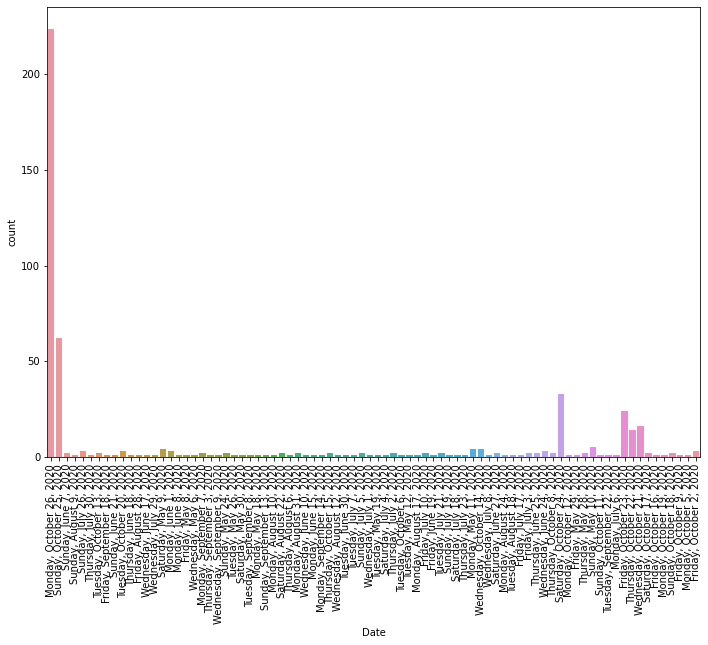

In [14]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(sales.Date,ax=ax)
#ax = sns.countplot(sales.Date)
locs, labels = plt.xticks()
rotate = plt.setp(labels, rotation = 90)

### Scraping from HighCharts viz.

In [23]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from time import sleep
from random import randint
import os
import requests
import json
import js2xml
import pyjsparser
from bs4 import BeautifulSoup 

In [69]:
def get_shoe_chart(url):
    driver = webdriver.Safari()
    sleep(2)
    #check for peremiterX
    # from credentials import username, password
    pw = open('stockx_scraper-master/passwords.txt').read().splitlines()
    username = pw[0]
    password = pw[1]

    #Navigate to login page, log in
    driver.get(url = "https://stockx.com/login")
    email = WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.ID, "email-login")))
    try:
        email.click()
        email.send_keys(username)
    except:
        sleep(2)
        driver.execute_script("document.getElementById('email-login').value='{u}'".format(u = username))
        sleep(randint(1,3))
        driver.execute_script("document.getElementById('password-login').value='{p}'".format(p = password))
        sleep(randint(1,3))
        driver.find_element_by_xpath('//*[@id="btn-login"]').click()
    
    #go to shoe
    sleep(5)
    try:
        driver.get(url)
    except TimeoutException:
        print("Could not retrieve info from URL") 
    #random sleep time
    sleep(randint(3,6))
    #get html 
    soup = BeautifulSoup(driver.page_source,"html.parser")
    return soup


In [74]:
get_shoe_chart('https://stockx.com/adidas-yeezy-boost-350-v2-marsh')

<html data-react-helmet="lang" lang="en"><head>
<title>adidas Yeezy Boost 350 V2 Marsh - FX9034</title>
<style type="text/css">svg:not(:root).svg-inline--fa {
  overflow: visible;
}

.svg-inline--fa {
  display: inline-block;
  font-size: inherit;
  height: 1em;
  overflow: visible;
  vertical-align: -0.125em;
}
.svg-inline--fa.fa-lg {
  vertical-align: -0.225em;
}
.svg-inline--fa.fa-w-1 {
  width: 0.0625em;
}
.svg-inline--fa.fa-w-2 {
  width: 0.125em;
}
.svg-inline--fa.fa-w-3 {
  width: 0.1875em;
}
.svg-inline--fa.fa-w-4 {
  width: 0.25em;
}
.svg-inline--fa.fa-w-5 {
  width: 0.3125em;
}
.svg-inline--fa.fa-w-6 {
  width: 0.375em;
}
.svg-inline--fa.fa-w-7 {
  width: 0.4375em;
}
.svg-inline--fa.fa-w-8 {
  width: 0.5em;
}
.svg-inline--fa.fa-w-9 {
  width: 0.5625em;
}
.svg-inline--fa.fa-w-10 {
  width: 0.625em;
}
.svg-inline--fa.fa-w-11 {
  width: 0.6875em;
}
.svg-inline--fa.fa-w-12 {
  width: 0.75em;
}
.svg-inline--fa.fa-w-13 {
  width: 0.8125em;
}
.svg-inline--fa.fa-w-14 {
  width: 0.875

In [ ]:
url = 'https://stockx.com/adidas-yeezy-boost-350-v2-marsh'
r = requests.get(url)
soup =BeautifulSoup(r.text,"html.parser")
all_scripts = soup.find_a

In [22]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Access to this page has been denied.</title>
<link href="https://fonts.googleapis.com/css?family=Open+Sans:300" rel="stylesheet"/>
<style>
        html, body {
            margin: 0;
            padding: 0;
            font-family: 'Open Sans', sans-serif;
            color: #000;
        }

        a {
            color: #c5c5c5;
            text-decoration: none;
        }

        .container {
            align-items: center;
            display: flex;
            flex: 1;
            justify-content: space-between;
            flex-direction: column;
            height: 100%;
        }

        .container > div {
            width: 100%;
            display: flex;
            justify-content: center;
        }

        .container > div > div {
            display: flex;
            width: 80%;
        }

        .customer-logo-wrapper {
     